<a href="https://colab.research.google.com/github/KarthikR-Projects/KarthikR-Projects/blob/main/Customer_Churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About: This is an analysis on customer churn rate of a Financial Institution**
- When consumers or members stop using a company's products or services, this is known as **customer churn**. Once a certain length of time has passed since a customer's last interaction with a business or service, the business usually treats that consumer as having churned.

- It goes without saying that businesses have to retain customers because doing so increases income and fosters long-lasting relationships with its users. Therefore, **Client retention is really important than customer acquisition**, and thus analysing churn rate is very important for further decision making.

In [4]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

In [110]:
#Upload the dataset
from google.colab import files
uploaded = files.upload()


In [111]:
#Load the dataset into a dataframe
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#Number of columns and rows
df.shape

(10000, 14)

In [14]:
# This means there are 10,000 rows or 'customers' and there are 14 columns or 'datapoints for each customer'.

In [15]:
#Columns of the dataset
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [16]:
#Check for missing data or NA values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#This means that we have no missing values or NA values in the dataset

In [112]:
#Statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [120]:
#Renaming the column header (not an important step)
df = df.rename(columns = {'Exited':'Churn'})

In [121]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
#Get exit or churn count
df['Churn'].value_counts() 
# 1 = YES and 0 = NO

0    7963
1    2037
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Churn count')]

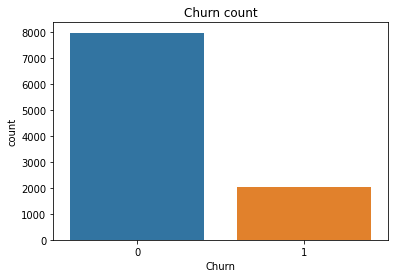

In [50]:
#Visualize the churn count
sns.countplot(df['Churn']).set(title='Churn count')

In [98]:
# Finding out the percentage of customers that are leaving
num_retained = df[df.Churn == 0].shape[0]
num_churned = df[df.Churn == 1].shape[0]


In [101]:
# Calculating the percentage of customers who stayed with the company
print(num_retained / (num_retained + num_churned) * 100, '% of the customers stayed with the company.')

# Calculating the percentage of customers who left the company
print(num_churned / (num_retained + num_churned) * 100, '% of the customers left the company.')

79.63 % of the customers stayed with the company.
20.369999999999997 % of the customers left the company.


This is an important information for when I'll try to evaluate my model to predict customer churn, because it means that just by guessing a random customer to have been retained from the data set, I have a **79.63%** chance of **guessing correctly**. So, I want my model’s accuracy to classify/predict if a customer  churn to be **higher than this percentage**.

[Text(0.5, 1.0, 'Churn count: In terms of Gender')]

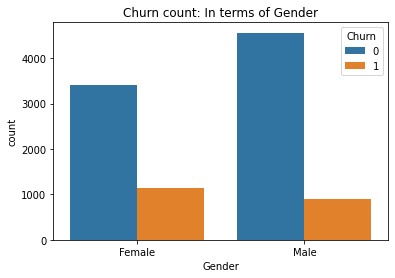

In [105]:
#Visualize the churn count for Male and Female 
sns.countplot(x='Gender', hue='Churn', data=df).set(title='Churn count: In terms of Gender')

Here, we can observe that 'Male retention' is slightly higher than 'Female retention', however this does not explains or justifies the churn rate as both the genders have almost the same churn count. Thus, we should study other aspects as well.

[Text(0.5, 1.0, 'Churn count: Geographical segmentation')]

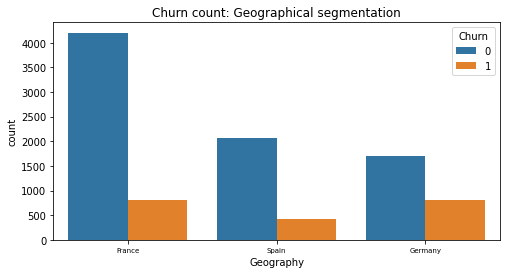

In [141]:
#Visualize Churn count for geographic areas
sns.countplot(x='Geography', hue='Churn', data=df).set(title='Churn count: Geographical segmentation')

- Here, we can see the customers from 'France' are more loyal as significant number of people stayed with the company
- 'Germany' has the highest Churn count, compared to other regions

In [164]:
numerical_features = ['Age', 'Creditscore']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75c837e590>,
      dtype=object)

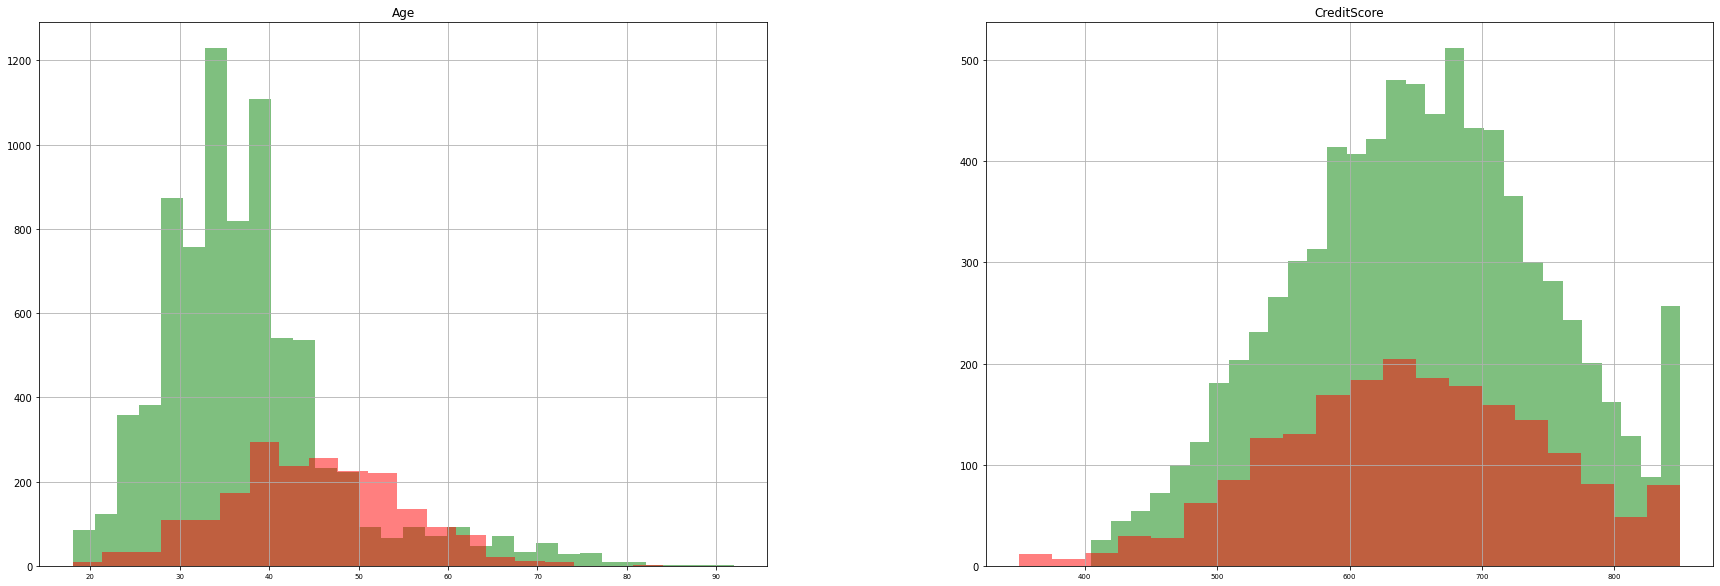

In [170]:
#Visualize Churn count with respect to age
numerical_features = ['Age', 'CreditScore']
fig, ax = plt.subplots(1, 2, figsize = (30,10))
df[df.Churn == 0][numerical_features].hist(bins=30, color='green', alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)

Through these graphical representations, we can observe the following points:
- Customers who are staying with the company, mostly lie between the age of 29 to 45 (Approx)
- The credit score of customer retained ranges from 420 to 850 (Approx) 

In [171]:
#Removing unnecesary columns
cleaned_df = df.drop('CustomerId', axis = 1)

In [173]:
cleaned_df.shape

(10000, 13)

In [175]:
# Convert all non-numeric data into Numeric data
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number:
   continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
#Check the datatypes, here we coverted evertything into numeric form
cleaned_df.dtypes

RowNumber            int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [177]:
cleaned_df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0


In [180]:
# Scaled the data 
X = cleaned_df.drop('Churn', axis= 1) #Feature data set 
y = cleaned_df['Churn'] #Target dataset

In [181]:
#Split the data into 80% Training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [182]:
#Create the model
model = LogisticRegression()

#train the model
model.fit(x_train, y_train)

LogisticRegression()

In [183]:
# Create prediction on the test data
predictions = model.predict(x_test)

# The prediction
print(predictions)

[0 0 0 ... 0 0 0]


In [184]:
# Check the precision, recall and f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.01      0.01       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000



The precision of the model is about 80% and the f1-score is about 89%. The accuracy of the model is about 80% which is **slightly better** than the 79.63% that I could’ve done just by guessing a customer would always stay with the company.